Coded, Noted and Created by Han 2024

# Bank Loan Granting Exploration & Prediction

### Data Exploration and Cleaning

dataset can be found at https://www.kaggle.com/datasets/atefehmirnaseri/bank-loan-granting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Bank_Loan_Granting.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [4]:
df.shape

(5000, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


There are 5000 rows and 14 columns in the dataset. The columns are as follows:
-  ID: Unique ID of the customer
-  Age: Age of the customer
-  Experience: Years of experience
-  Income: Annual income of the customer
-  ZIP Code: ZIP code of the customer
-  Family: Family size of the customer
-  CCAvg: Average spending on credit cards per month -> ```this column is still in object type, so it needs to be converted to float type later.```
- Education : the level of customer's Education(undergraduate,graduate,professional)
- Mortgage : the Value of the customer's mortgage (the thing that the customer uses as a guarantee to the bank/pinjaman yang pakai jaminan dan itu valuenya) 
- Securities Account : whether the customer has a security account or not(it's also known as an investment account)
- CD Account : the customer has a CD account or not(a type of savings account that lets the customer earn interest - on a fixed amount of money for a fixed period) -> Deposito
- Online : the customer uses the bank's online services or not
- CreditCard : the customer uses the bank's credit card or not
- Personal Loan : the customer is granted loans or not -> ```this is the target variable```

#### Questions gathered from columns present in the dataset:
- What is the distribution of the target variable?
- What is the annual income distribution of the customers?
- Is credit card spending related to the annual income of the customers?
- What is the corelation between having a credit card and having a personal loan?
- Is having high mortgage value related to having a personal loan?
- Is having a CD account related to having a personal loan?
- Correlation between experience and income
- Correlation between education and income
- Overall correlation between all the columns to the target variable

#### Target Variable Distribution

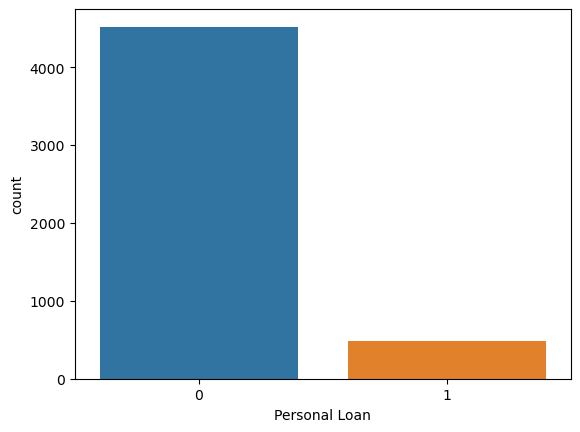

In [6]:
#Personal loan
sns.countplot(x='Personal Loan',data=df)
plt.show()

Majority of the customers are not granted loans. The dataset is imbalanced. This needs to be taken into consideration while building the model and may need to use SMOTE to balance the dataset.

#### Annual Income Distribution

<Axes: xlabel='Income'>

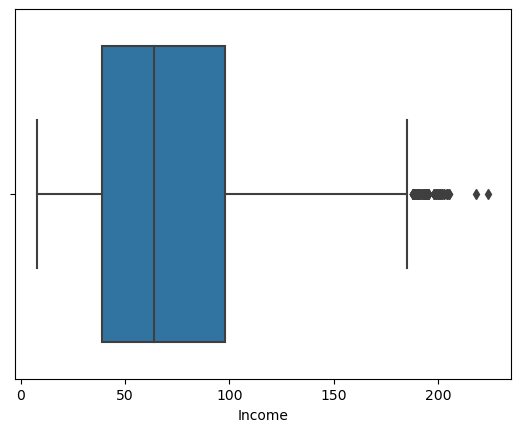

In [16]:
sns.boxplot(x='Income',data=df)

d:\Conda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


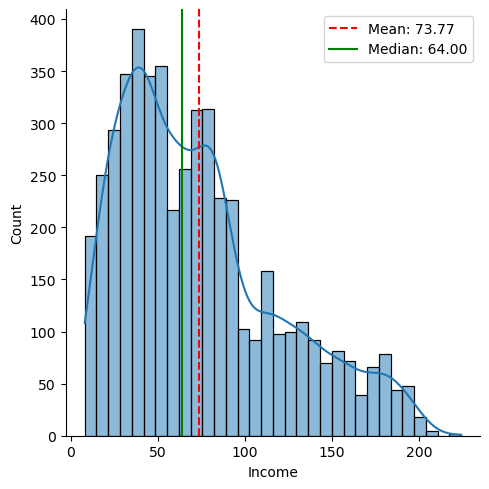

In [19]:
mean_income = df['Income'].mean()
median_income = df['Income'].median()

sns.displot(data=df, x='Income', kde=True)  #The kde line in sns.displot is a representation of the kernel density estimate, which provides a smoothed probability density curve for the data. It is often used to visualize the distribution of data alongside a histogram.
plt.axvline(mean_income, color='r', linestyle='--', label=f'Mean: {mean_income:.2f}')
plt.axvline(median_income, color='g', linestyle='-', label=f'Median: {median_income:.2f}')
plt.legend()
plt.show()

In [23]:
skewness = df['Income'].skew()
std_dev = df['Income'].std()
print(f'Skewness: {skewness}')
print(f'Standard Deviation: {std_dev}')

Skewness: 0.8413386072610816
Standard Deviation: 46.033729321086334


The majority of income is in lower side of the distribution which is between 50k to 100k.

Based on the distribution itself, the skewness is 0.84, which means the distribution is right-skewed and can be seen from the plot where the tail extends to right and mean is higher than median. This means that even the majority of the customers have lower income, there are still some customers with high income.

#### Credit Card Spending vs Annual Income

In [26]:
df['CCAvg'].dtype

dtype('O')

Convert the CCAvg column from object to float type.
Such as 1/2 to 0.5

In [ ]:
df['CCAvg'] = df['CCAvg'].apply(lambda x: 
    eval(x.split('/')[0]) /    # Numerator
    eval(x.split('/')[1])      # Denominator
    if eval(x.split('/')[1]) != 0  # Check for zero division
    else 0)                    # Return 0 if denominator is zero

In [29]:
df['CCAvg'].dtype , df['CCAvg'].head()

(dtype('float64'),
 0    0.016667
 1    0.020000
 2    0.000000
 3    0.028571
 4    0.000000
 Name: CCAvg, dtype: float64)

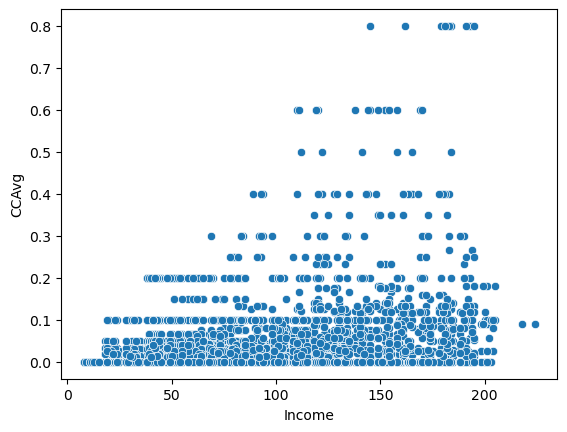

In [30]:
#Visualizing the correlation between CC Spending and Income
sns.scatterplot(x='Income', y='CCAvg', data=df)
plt.show()

In [31]:
#Pearson correlation coefficient
corr = df['Income'].corr(df['CCAvg'])
print(f'Pearson Correlation Coefficient: {corr:.2f}')

Pearson Correlation Coefficient: 0.38


From visualization and calculation there are weak to moderate relationship between the two variables. 

There are weak patterns that can be seen from the plot, but it is not strong enough to say that the two variables are highly correlated. There are increase in the credit card spending as the income increases, but there are also some customers with high income but low credit card spending.

#### Credit Card vs Personal Loan

<Axes: xlabel='CreditCard', ylabel='count'>

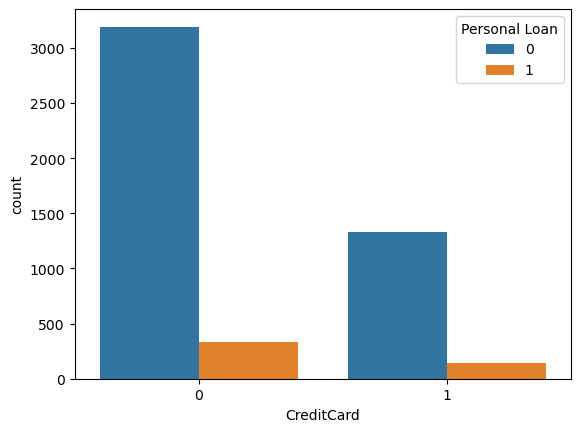

In [34]:
# Visualize corelation between credit card and personal loan
sns.countplot(x='CreditCard', hue='Personal Loan', data=df)